# K Means Clustering

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
# Importing the dataset
data = pd.read_csv('data/xclara.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [5]:
data.shape

(3000, 2)

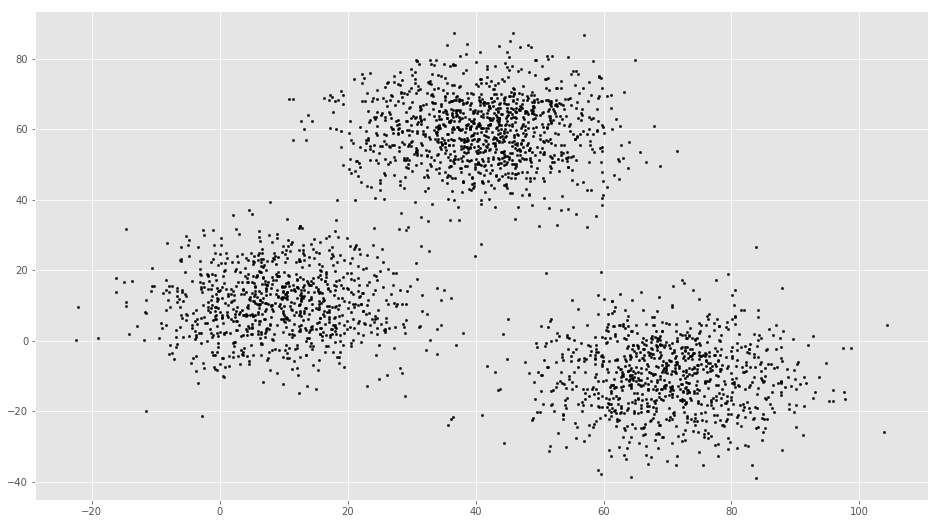

In [11]:
# plotting
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=5)

In [12]:
def dist(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [31]:
# number of clusters
k = 3
# x coords of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# y coords of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C

array([[ 27.,  64.],
       [ 71.,  57.],
       [ 79.,  10.]], dtype=float32)

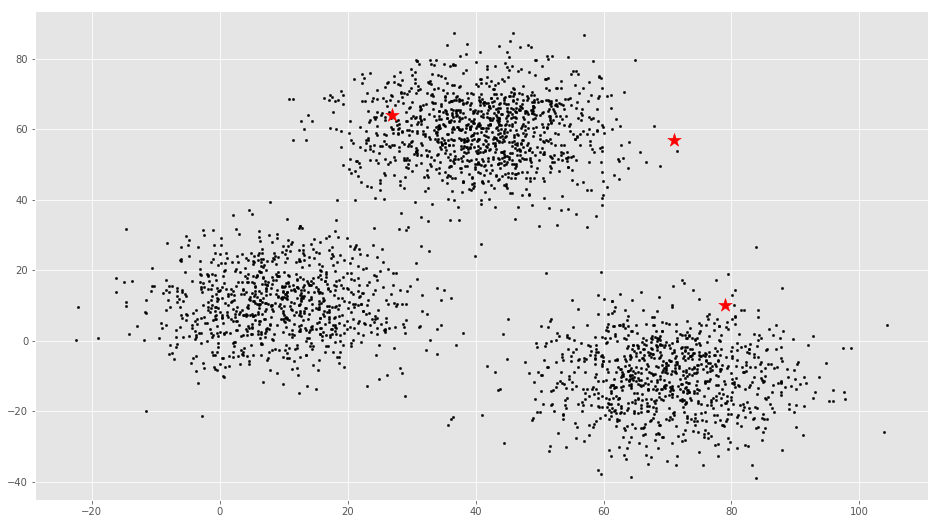

In [32]:
# plotting along with centroids
plt.scatter(f1, f2, c='black', s=5)
plt.scatter(C_x, C_y, marker='*', s=200, c='red')

In [33]:
# old values of centroids
C_old = np.zeros(C.shape)
# cluster labels (0, 1, 2)
clusters = np.zeros(len(X))
# error func = dist b/w new centroids and old centroids
error = dist(C, C_old, None)
# loop will run till error become zero
while error != 0:
    # assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # storing the old centroids values
    C_old = deepcopy(C)
    # finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

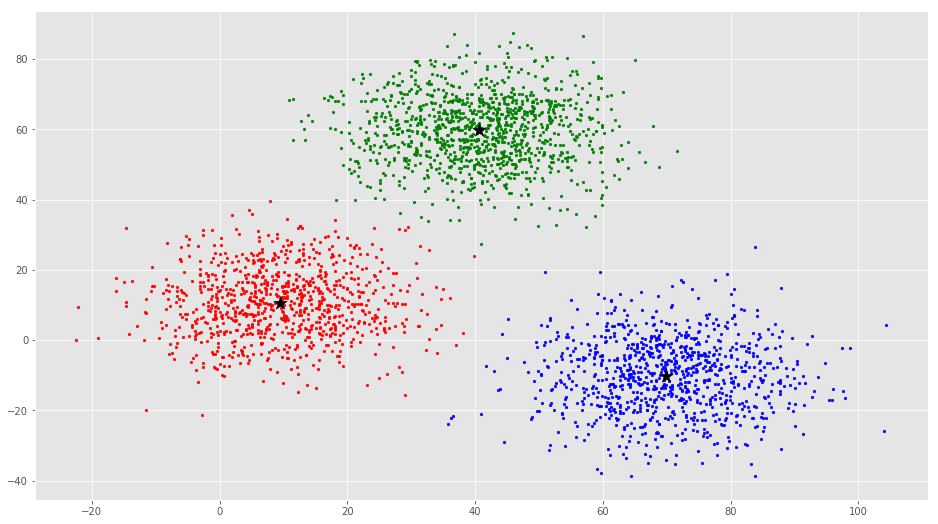

In [34]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')

## Using scikit-learn 

In [37]:
from sklearn.cluster import KMeans

# number of clusters
kmeans = KMeans(n_clusters = 3)
# fitting the input data
kmeans = kmeans.fit(X)
# getting the cluster labels
labels = kmeans.predict(X)
# centroid values
centroids = kmeans.cluster_centers_

In [38]:
C

array([[  9.47804546,  10.68605232],
       [ 40.68362808,  59.71589279],
       [ 69.92418671, -10.1196413 ]], dtype=float32)

In [39]:
centroids

array([[  9.4780459 ,  10.686052  ],
       [ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119]])

In [41]:
# making new dataset using make_blobs
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

X, y = make_blobs(n_samples=800, n_features=3, centers=4)

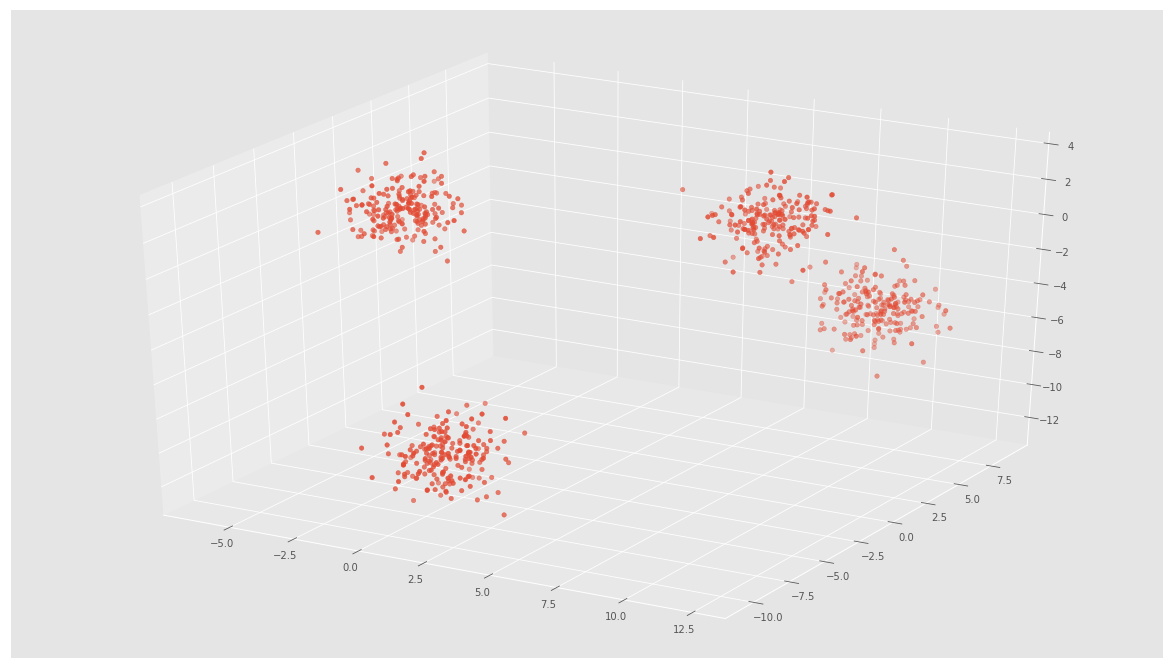

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [50]:
# number of clusters
kmeans2 = KMeans(n_clusters = 4)
# fitting the input data
kmeans2 = kmeans2.fit(X)
# getting the cluster labels
labels2 = kmeans2.predict(X)
# centroid values
C2 = kmeans2.cluster_centers_

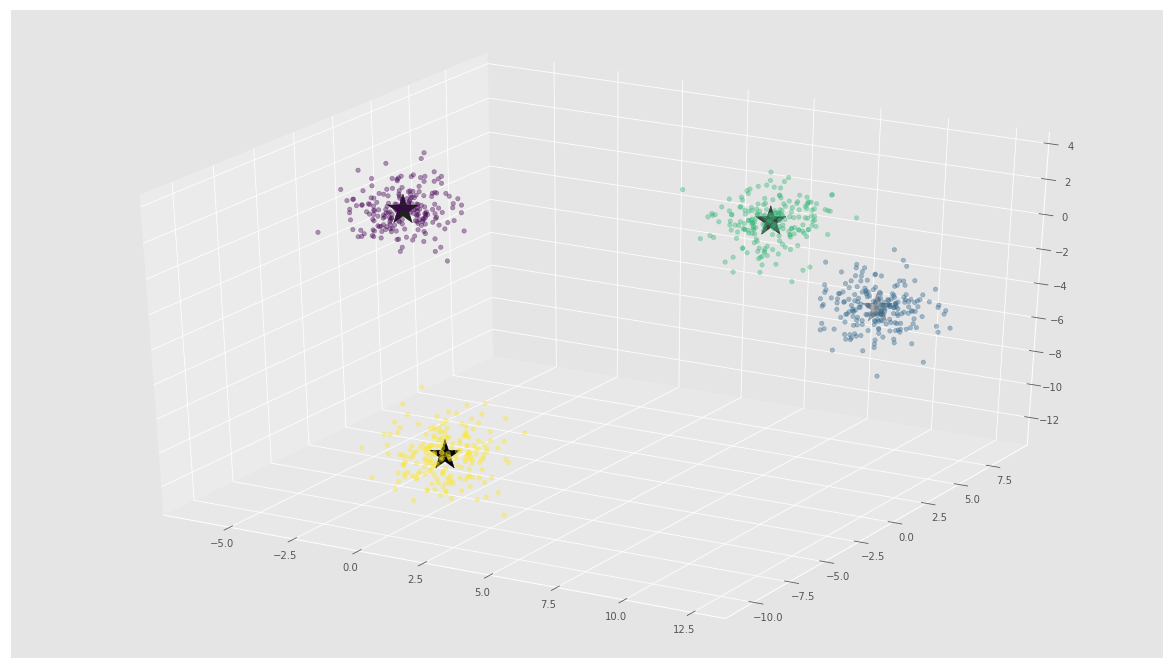

In [55]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, alpha= 0.4)
ax.scatter(C2[:, 0], C2[:, 1], C2[:, 2], marker='*', c='black', s=1000)

# Drawbacks of kmeans clustering

## Clustering non-clustered data

Run k-means on uniform data, and you will still get clusters! It doesn't tell you when the data just does not cluster, and can take your research into a dead end this way.

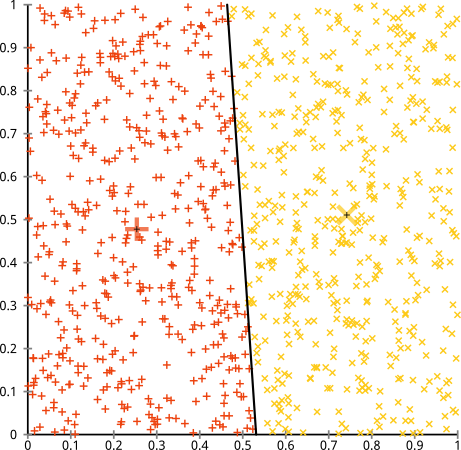

## Sensitive to scale

Rescaling your datasets will completely change results. While this itself is not bad, not realizing that you have to spend extra attention to scaling your data is bad. Scaling factors are extra d hidden parameters in k-means that "default" to 1 and thus are easily overlooked, yet have a major impact (but of course this applies to many other algorithms, too).

This is probably what you referred to as "all variables have the same variance". Except that ideally, you would also consider non-linear scaling when appropriate.

Also be aware that **it is only a heuristic to scale every axis to have unit variance**. This doesn't ensure that k-means works. Scaling depends on the meaning of your data set. And if you have more than one cluster, you would want every cluster (independently) to have the same variance in every variable, too.

Here is a classic counterexample of data sets that k-means cannot cluster. Both axes are i.i.d. in each cluster, so it would be sufficient to do this in 1 dimension. But the clusters have varying variances, and k-means thus splits them incorrectly.

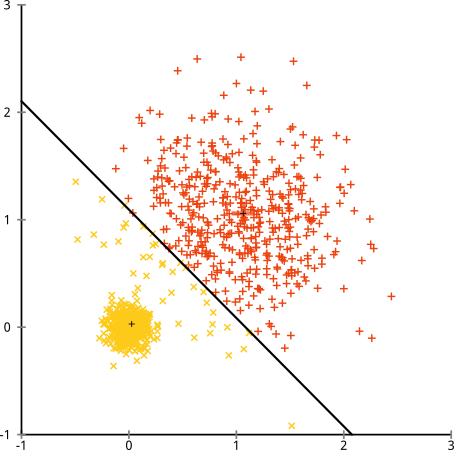

I don't think this counterexample for k-means is covered by your points:

All clusters are spherical (i.i.d. Gaussian).
All axes have the same distribution and thus variance.
Both clusters have 500 elements each.
Yet, k-means still fails badly (and it gets worse if I increase the variance beyond 0.5 for the larger cluster) But: **it is not the algorithm that failed. It's the assumptions, which don't hold.** K-means is working perfectly, it's just optimizing the wrong criterion.

## Even on perfect data sets, it can get stuck in a local minimum


Below is the best of 10 runs of k-means on the classic A3 data set. This is a synthetic data set, designed for k-means. 50 clusters, each of Gaussian shape, reasonably well separated. Yet, it only with k-means++ and 100 iterations I did get the expected result... (below is 10 iterations of regular k-means, for illustration).

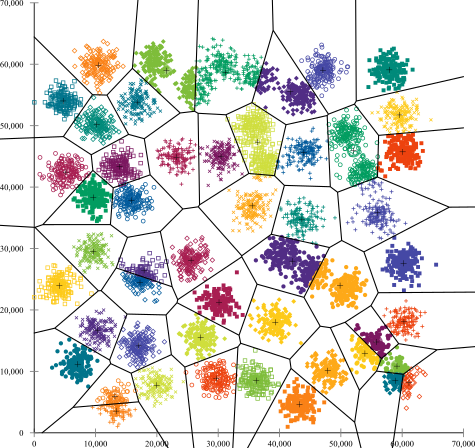

You'll quickly find many clusters in this data set, where k-means failed to find the correct structure. For example in the bottom right, a cluster was broken into three parts. But there is no way, k-means is going to move one of these centroids to an entirely different place of the data set - it's trapped in a local minimum (and this already was the best of 10 runs!)

And there are many of such local minima in this data set. Very often when you get two samples from the same cluster, it will get stuck in a minimum where this cluster remains split, and two other clusters merged instead. Not always, but very often. So you need a lot of iterations to have a lucky pick. With 100 iterations of k-means, I still counted 6 errors, and with 1000 iterations I got this down to 4 errors. K-means++ by the way it weights the random samples, works much better on this data set.

**Means are continuous** <br>
While you can run k-means on binary data (or one-hot encoded categorical data) the results will not be binary anymore. So you do get a result out, but you may be unable to interpret it in the end, because it has a different data type than your original data.

**Hidden assumption: SSE is worth minimizing** <br>
This is essentially already present in above answer, nicely demonstrated with linear regression. There are some use cases where k-means makes perfect sense. When Lloyd had to decode PCM signals, he did know the number of different tones, and least squared error minimizes the chance of decoding errors. And in color quantization of imaged, you do minimize color error when reducing the palette, too. But on your data, is the sum of squared deviations a meaningful criterion to minimize?

In above counterexample, the variance is not worth minimizing, because it depends on the cluster. Instead, a Gaussian Mixture Model should be fit to the data, as in the figure below:

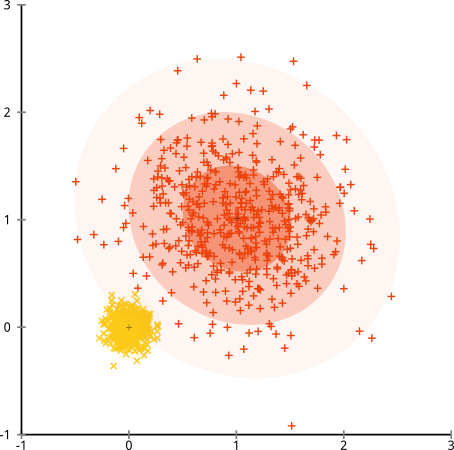
Gaussian Mixture Modeling

(But this is not the ultimate method either. It's just as easy to construct data that does not satisfy the "mixture of k Gaussian distributions" assumptions, e.g., by adding a lot of background noise)

**Too easy to use badly** <br>
All in all, it's too easy to throw k-means on your data, and nevertheless get a result out (that is pretty much random, but you won't notice). I think it would be better to have a method which can fail if you haven't understood your data...

**K-means as quantization** <br>
If you want a theoretical model of what k-means does, consider it a quantization approach, not a clustering algorithm.

The objective of k-means - minimizing the squared error - is a reasonable choice if you replace every object by its nearest centroid. (It makes a lot less sense if you inspect the groups original data IMHO.)

There are very good use cases for this. The original PCM use case of Lloyd comes to mind, or e.g. color quanization (Wikipedia). If you want to reduce an image to k colors, you do want to replace every pixel with the nearest centroid. Minimizing the squared color deviation then does measure L2 optimality in image approximation using k colors only.

This quantization is probably quite similar to the linear regression example. Linear regression finds the best linear model. And k-means finds (sometimes) the best reduction to k values of a multidimensional data set. Where "best" is the least squared error.

IMHO, k-means is a good quantization algorithm (see the first image in this post - if you want to approximate the data set to two points, this is a reasonable choice!). If you want to do cluster analysis as in discover structure then k-means is IMHO not the best choice. It tends to cluster when there are not clusters, and it cannot recognize various structures you do see a lot in data.